# Machine Learning and Data Processing 

In [3]:
#Import cac thu vien cua Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Import Dataset

In [4]:
data_df=pd.read_csv('./data.csv')

In [7]:
data_df # 1 Knowing Data Set

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Missing Data Replacement 

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [15]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percent= missing_data/len(data_df)*100
    print(f"Colmuns: {col}: has {missing_percent}% missing data")

Colmuns: Country: has 0.0% missing data
Colmuns: Age: has 10.0% missing data
Colmuns: Salary: has 10.0% missing data
Colmuns: Purchased: has 0.0% missing data


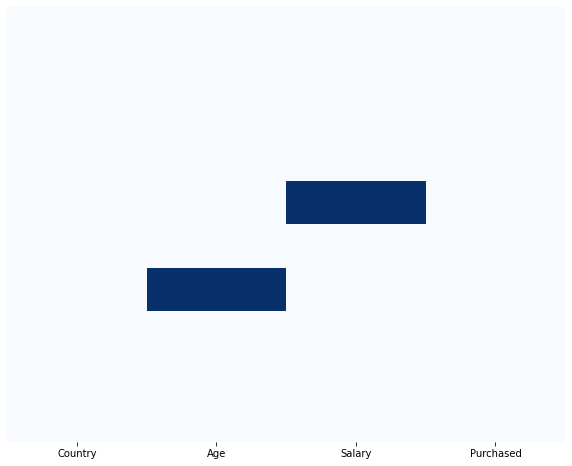

In [24]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(data_df.isna(),cmap='Blues',cbar=False ,yticklabels=False);

In [28]:
x = data_df.iloc[:,:-1].values

In [29]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [30]:
y=  data_df.iloc[:,-1].values

In [31]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [35]:
# FIT DATA
from sklearn.impute import SimpleImputer

imputer =SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x[:, 1:3])
x[:, 1:3]=imputer.transform(x[:, 1:3])


In [36]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

### Endcode Categorical Data
**Encode Independent (doclap) variable (X)**

In [37]:
# Ma hoa du lieu doanh muc (Datatype=Strings => Datatype:Numrecial)
#Bien y la bien phu thuoc 

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [45]:
ct  = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x = ct.fit_transform(x)

In [46]:
x # (France,Ger,Spain,Age,Salary)

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

**Encode Dependent (phu thuoc) variable (Y)**

In [47]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [50]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Spilitting Dataset (X=data,Y=Output) into the Training Test(80%) and Test(20%) set 

In [54]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [55]:
x_train,x_test

(array([[1.0, 0.0, 0.0, 35.0, 58000.0],
        [1.0, 0.0, 0.0, 44.0, 72000.0],
        [1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 1.0, 0.0, 30.0, 54000.0],
        [1.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [0.0, 0.0, 1.0, 38.0, 61000.0],
        [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object),
 array([[0.0, 1.0, 0.0, 50.0, 83000.0],
        [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object))

In [56]:
y_train,y_test

(array([1, 0, 1, 0, 1, 1, 0, 0]), array([0, 1]))

In [57]:
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Feature Scaling

In [58]:
# CO dan du lieu
#Standarddisation Chinh quy hoa
#Normalizastion Tieu chuan hoa

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,3:]=sc.fit_transform(x_train[:,3:])

In [63]:
x_train

array([[1.0, 0.0, 0.0, -0.7529426005471074, -0.6260377781240922],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.013042950055349],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450698],
       [0.0, 1.0, 0.0, -1.7314961608249366, -1.0943465576039326],
       [1.0, 0.0, 0.0, -0.3615211764359758, 0.4276569757055486],
       [0.0, 1.0, 0.0, 0.22561095973072173, 0.05040823668012205],
       [0.0, 0.0, 1.0, -0.16581046438040992, -0.274806193514212],
       [0.0, 0.0, 1.0, -0.013591021670525248, -1.328500947343853]],
      dtype=object)

In [65]:
x_test[:,3:] = sc.transform(x_test[:,3:])

In [66]:
x_test

array([[0.0, 1.0, 0.0, 50.00000000000001, 83000.0],
       [0.0, 0.0, 1.0, 27.000000000000004, 48000.0]], dtype=object)

# END